# Generar imágenes y datos de los resultados

Este notebook se ha utilizado para generar distintos gráficos y tablas que se incluyen en el trabajo escrito.

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
import os

# Nombre del directorio
out_directory = "output_plots"

# Ruta completa del directorio
path = os.path.join(os.getcwd(), out_directory)

# Crear el directorio si no existe
if not os.path.exists(path):
    os.makedirs(path)

# Figure features
plt.style.use(['science', 'ieee', 'vibrant'])#, 'grid'

plt.rcParams.update({
    "font.family": "Palatino" # Para que coincida con la tipografía del texto.
})

# Colores personalizados
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', ['#004DB3', '#33BBEE', '#EE7733', '#EE3377', '#CC3311', '#009988', '#6600CC'])

Tamaño figuras:
```
fig = plt.figure(figsize=(1.5*3.5, 2.625))    # Una única imagen por fila

fig = plt.figure(figsize=(3.5, 2.625))        # Dos imágenes por fila
```

## Ajuste de hiperparámetros

### SVM

Archivo CSV leído correctamente:
         c  acc_tr     acc
0  0.00001  0.3489  0.3455
1  0.00010  0.4902  0.4698
2  0.00100  0.6056  0.5435
3  0.01000  0.7117  0.5510
4  0.10000  0.8029  0.5220


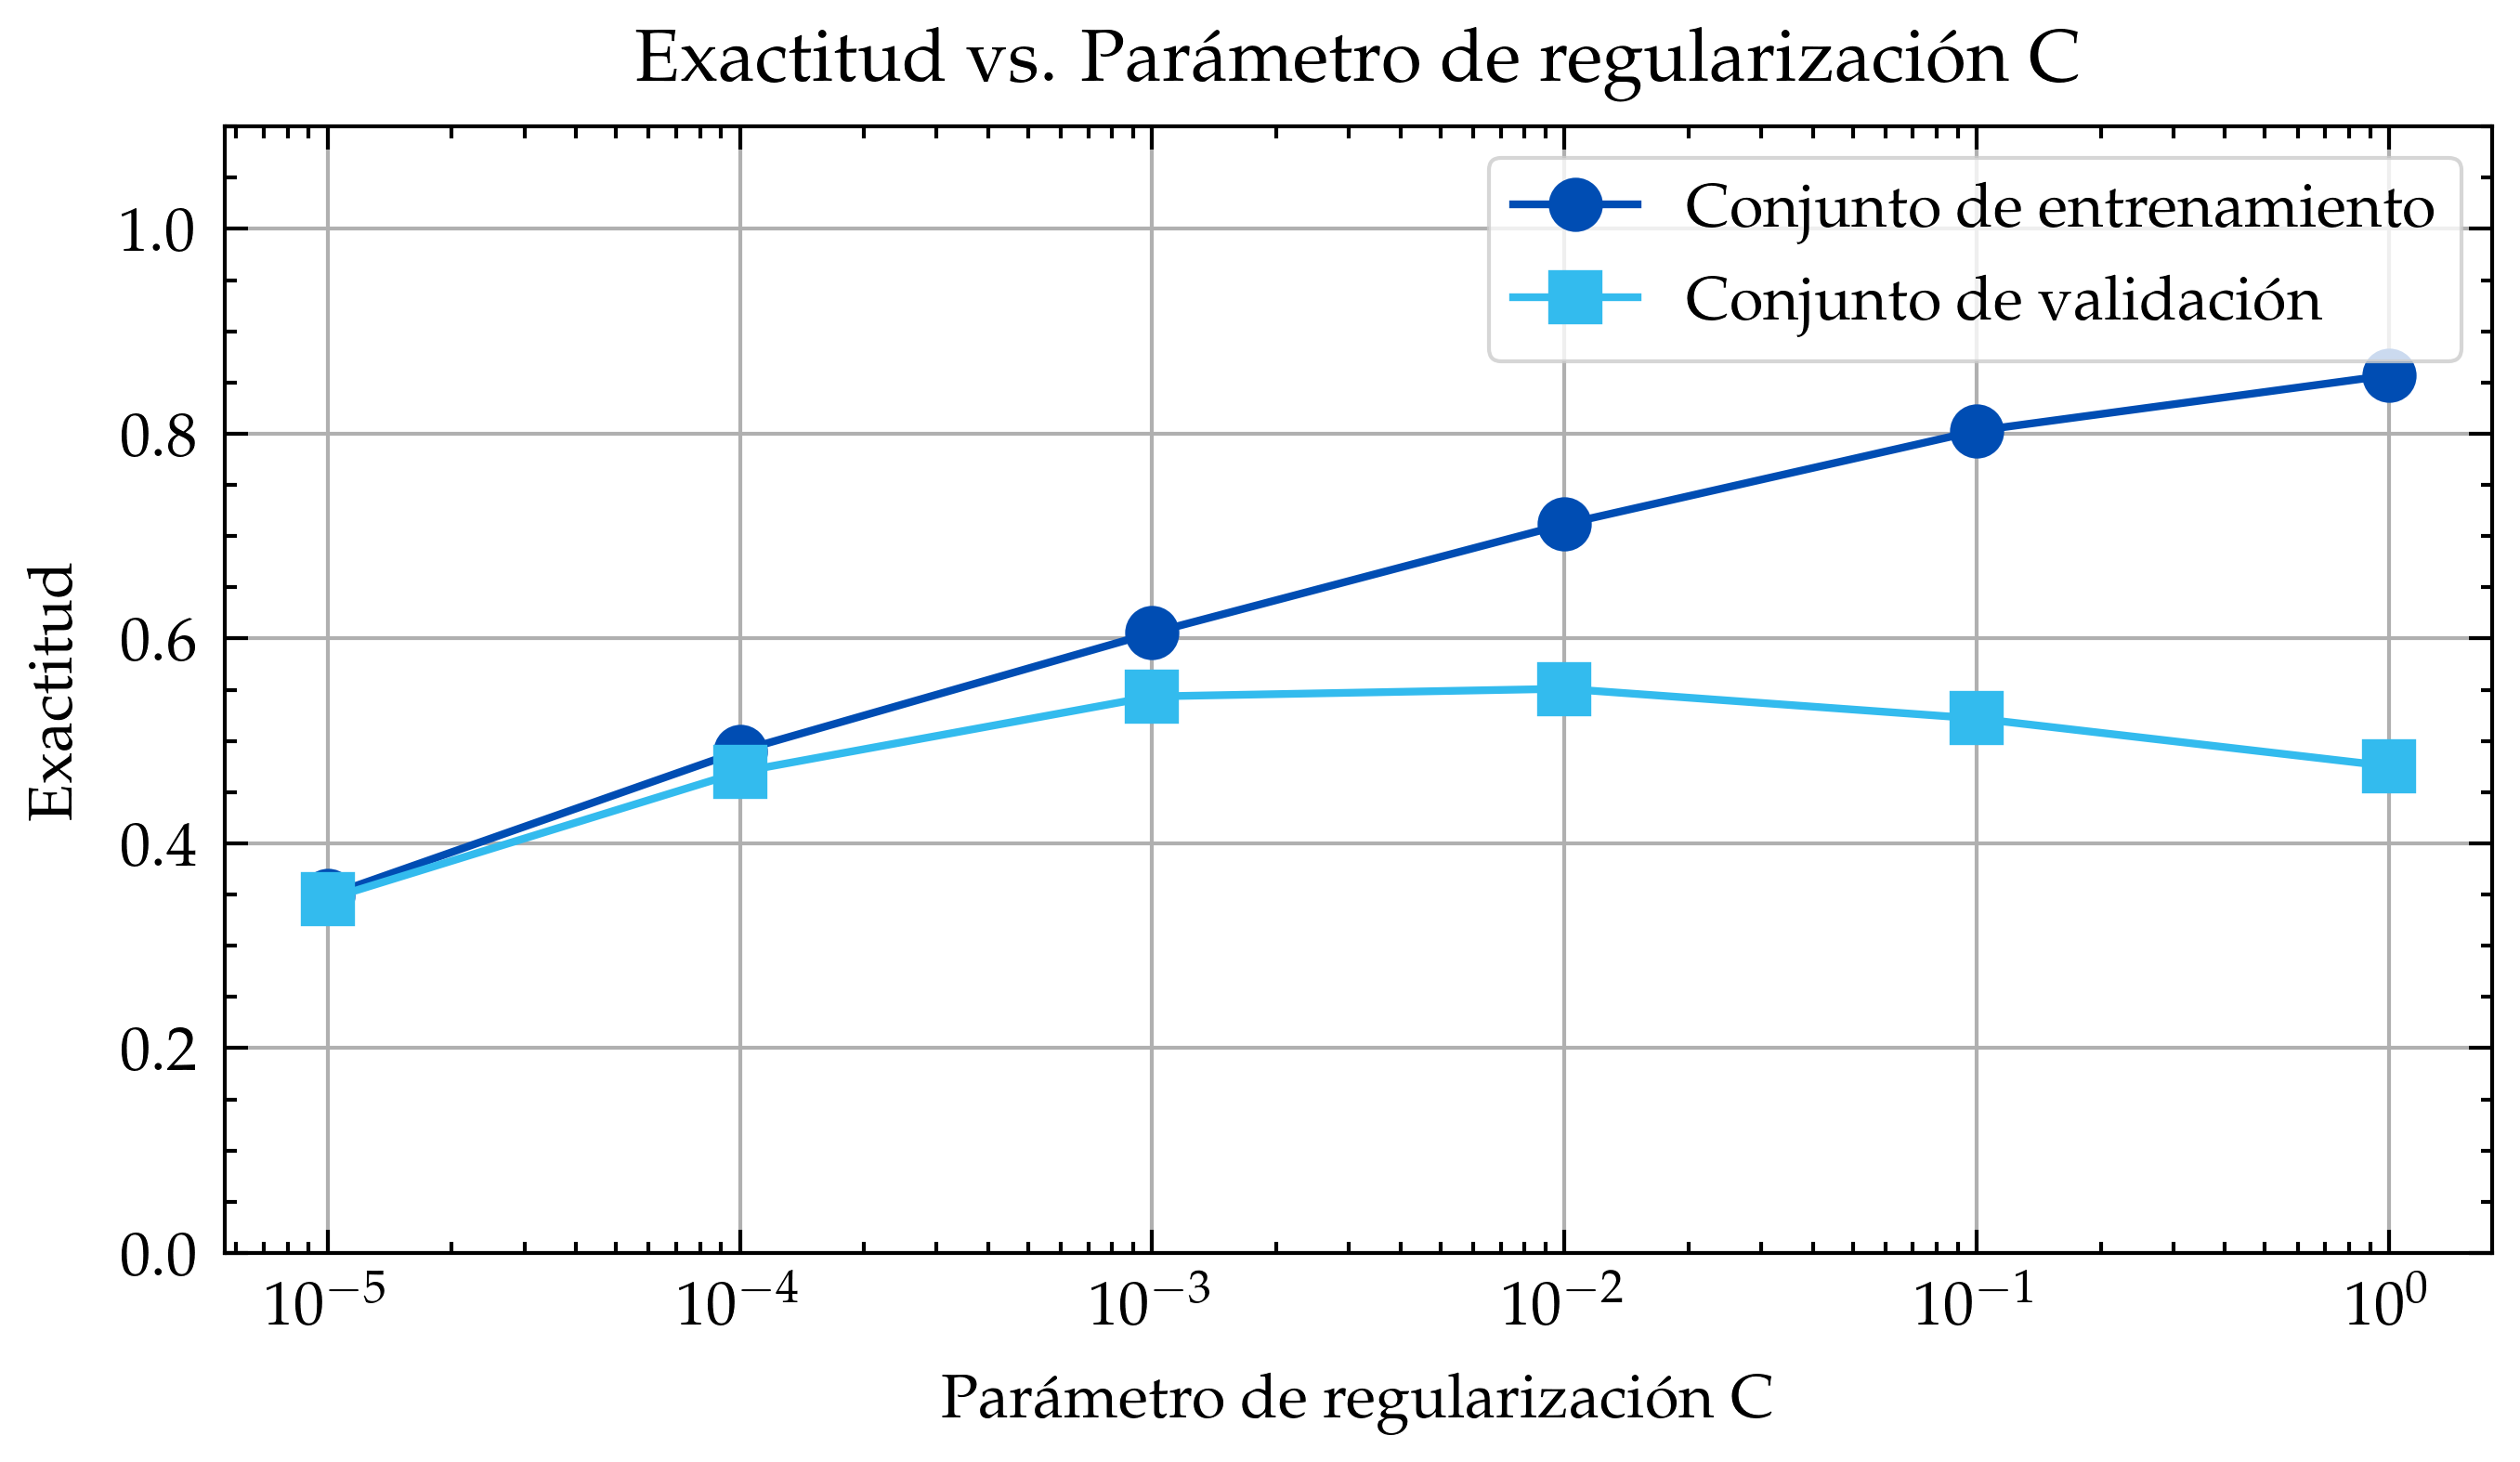

In [3]:
# Ruta del archivo CSV
file_path = "01_SVM/Grid_search/data_file.csv"
try:
    df = pd.read_csv(file_path)
    print("Archivo CSV leído correctamente:")
    print(df.head())  # Mostrar las primeras filas del DataFrame
except FileNotFoundError:
    print(f"No se pudo encontrar el archivo {file_path}")
    
plt.figure(figsize=(1.5*3.5, 2.625))
plt.semilogx(df['c'], df['acc_tr'],'-o' , label="Conjunto de entrenamiento")
plt.semilogx(df['c'], df['acc'],'-s', label="Conjunto de validación")
plt.grid(True) #, which="both")
plt.xlabel("Parámetro de regularización C")
plt.ylabel("Exactitud")
plt.ylim([0,1.1])
legend = plt.legend(frameon=True)
legend.get_frame().set_linewidth(0.5)
plt.title('Exactitud vs. Parámetro de regularización C')
plt.savefig(out_directory+'/SVM_hiperp.pdf')

### RF

Archivo CSV leído correctamente:
    depth  acc_tr     acc
0       5  0.1815  0.1816
1      10  0.4434  0.3949
2      15  0.8325  0.5404
3      20  0.9676  0.5999
4      25  0.9910  0.6196
5      30  0.9962  0.6246
6      35  0.9976  0.6239
7      40  0.9982  0.6246
8      45  0.9984  0.6299
9      50  0.9985  0.6262
10     55  0.9985  0.6266


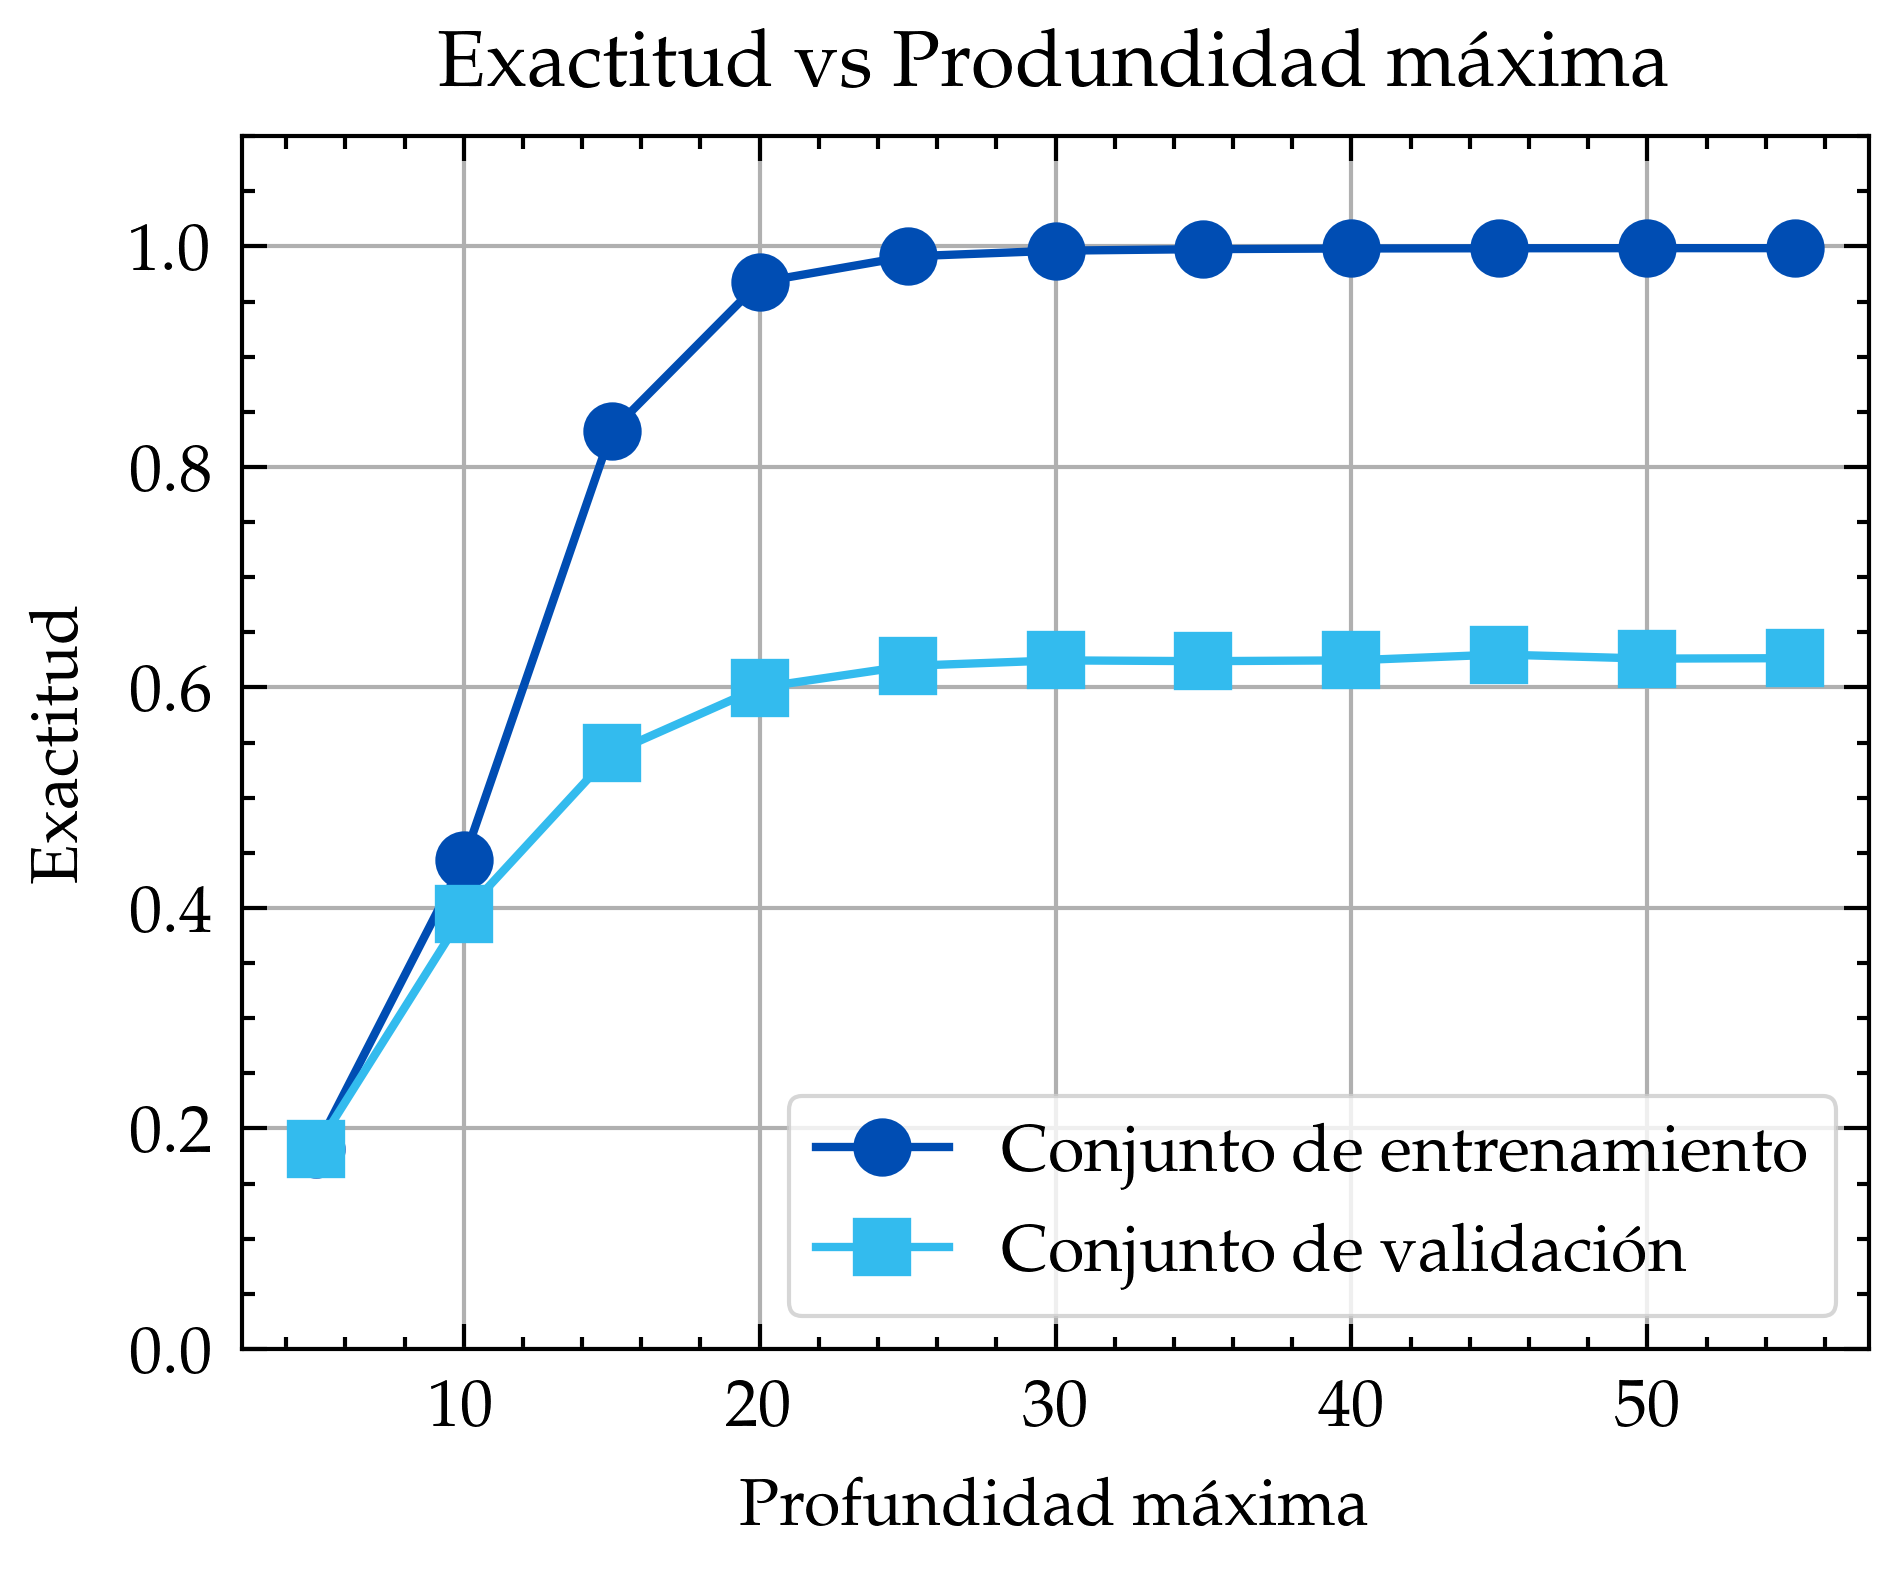

In [140]:
# Ruta del archivo CSV
file_path = "02_Random_Forest/Grid_search/data_file_depth.csv"
try:
    df = pd.read_csv(file_path)
    print("Archivo CSV leído correctamente:")
    print(df)  # Mostrar las primeras filas del DataFrame
except FileNotFoundError:
    print(f"No se pudo encontrar el archivo {file_path}")
    
depth_list = df['depth']
acc_tr = df['acc_tr']
acc = df['acc']

plt.figure(figsize=(3.5, 2.625))
plt.plot(depth_list, acc_tr,'-o', label="Conjunto de entrenamiento")
plt.plot(depth_list, acc,'-s', label="Conjunto de validación")
plt.grid(True)
plt.ylim([0,1.1])
plt.xlabel("Profundidad máxima")
plt.ylabel("Exactitud")
legend = plt.legend(frameon=True, loc='lower right')
legend.get_frame().set_linewidth(0.5)
plt.title('Exactitud vs Produndidad máxima')
plt.savefig(out_directory+'/RF_hiperp_depth.pdf')

Archivo CSV leído correctamente:
    n_estimators  acc_tr     acc
0             10  0.9951  0.5064
1             20  0.9980  0.5707
2             30  0.9983  0.5909
3             40  0.9983  0.6040
4             50  0.9984  0.6130
5             60  0.9984  0.6177
6             70  0.9984  0.6193
7             80  0.9984  0.6234
8             90  0.9984  0.6260
9            100  0.9984  0.6274
10           110  0.9984  0.6300
11           120  0.9984  0.6297
12           130  0.9984  0.6308
13           140  0.9984  0.6322
14           150  0.9984  0.6332


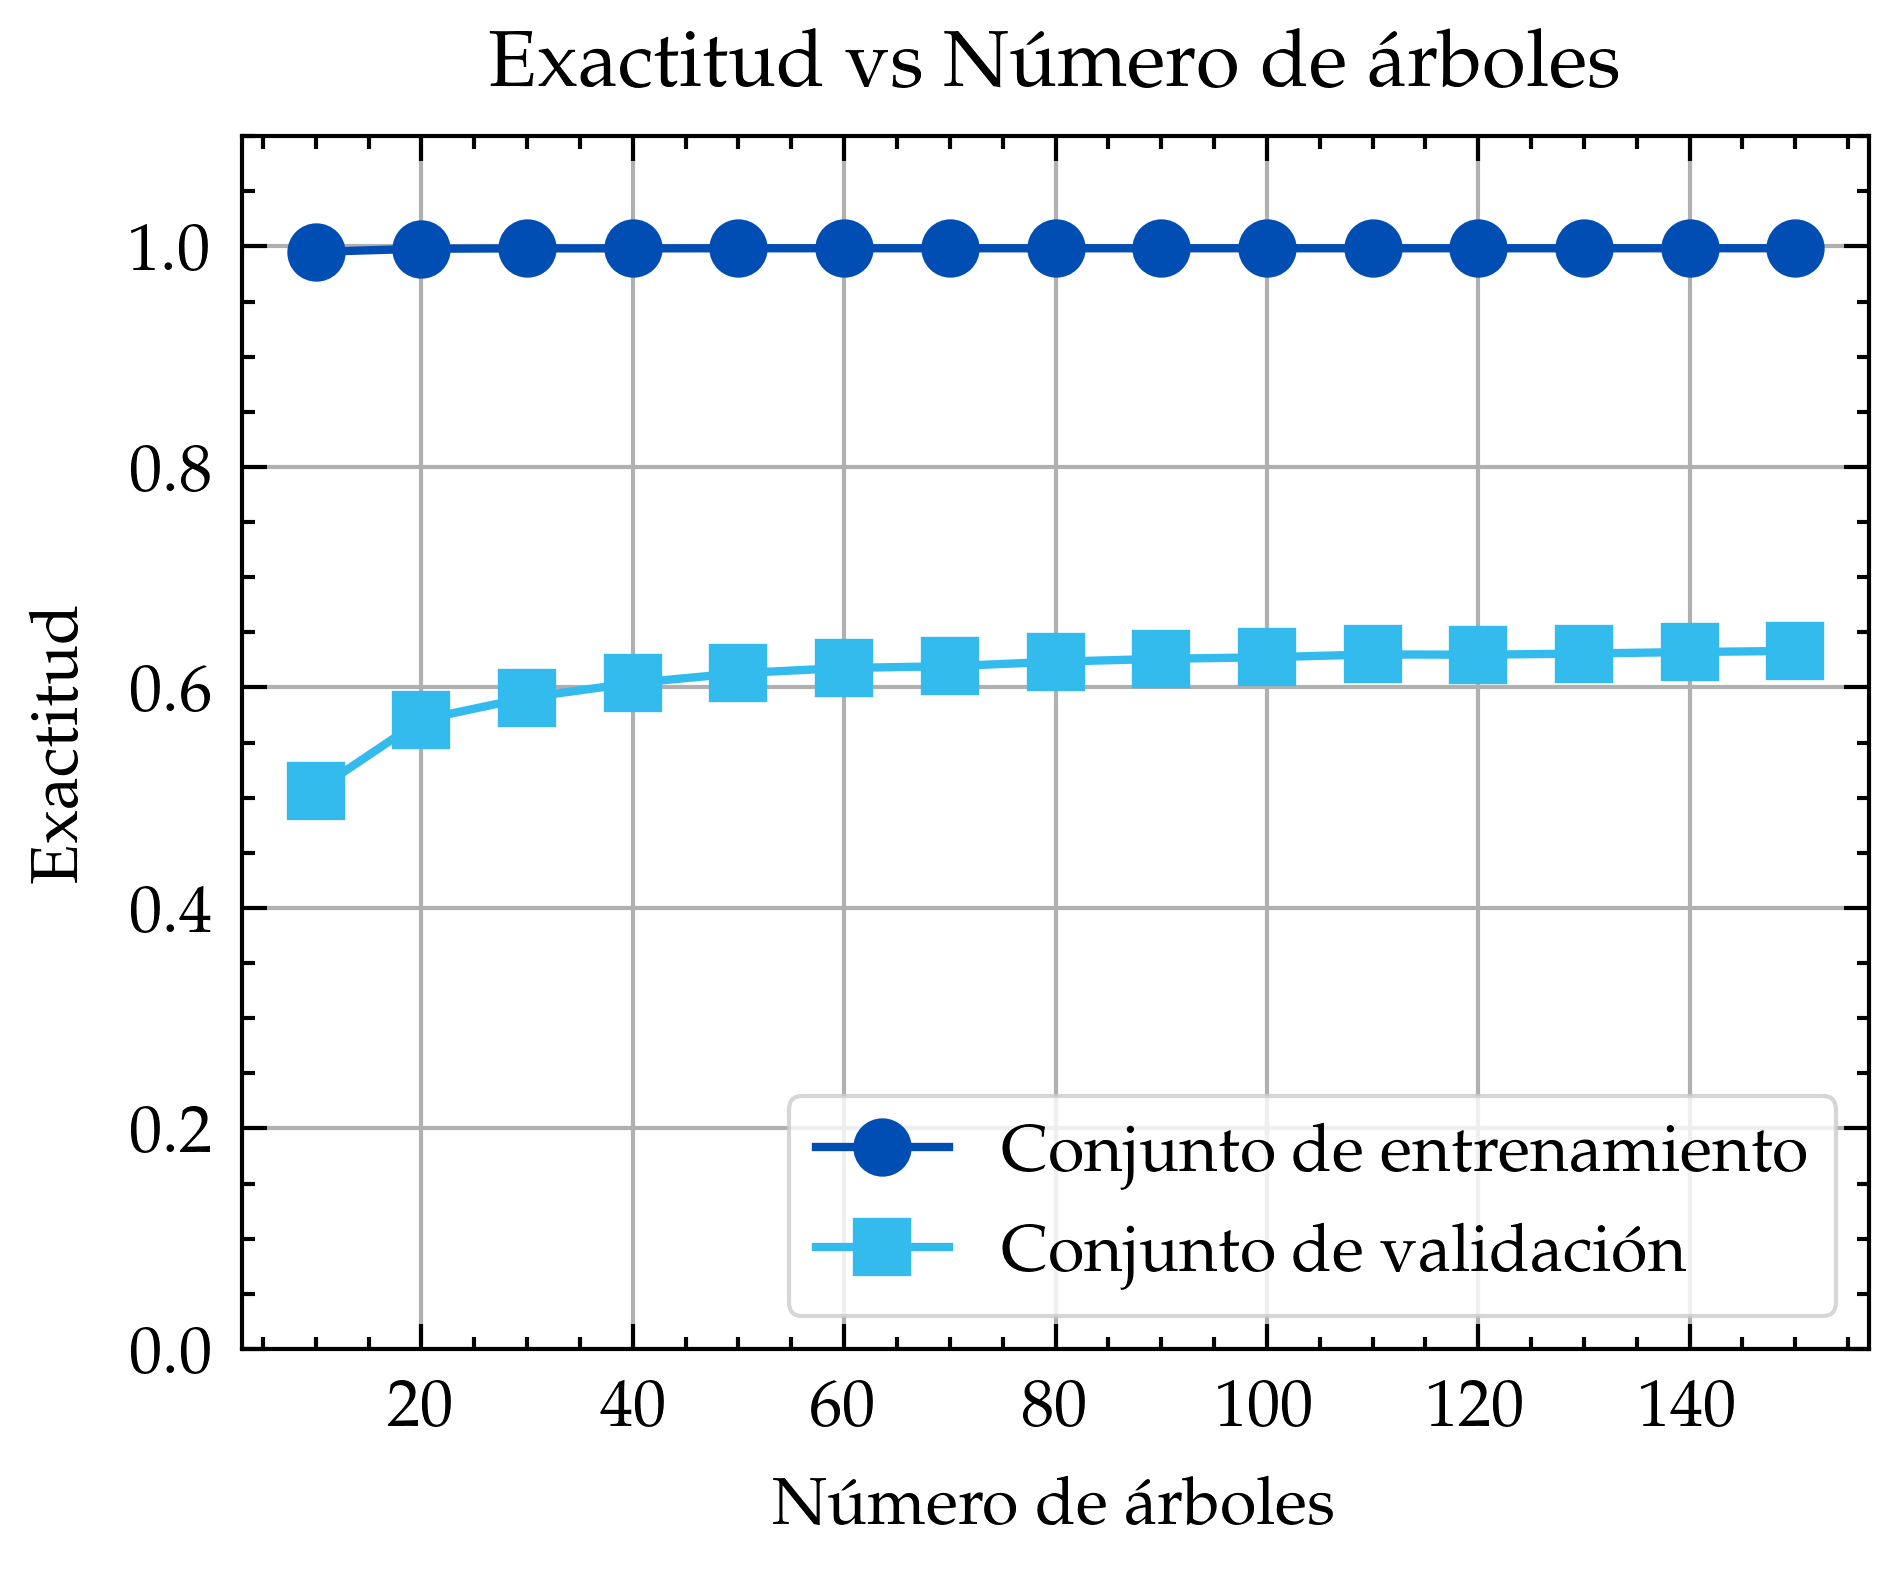

In [141]:
# Ruta del archivo CSV
file_path = "02_Random_Forest/Grid_search/data_file_estimators.csv"
try:
    df = pd.read_csv(file_path)
    print("Archivo CSV leído correctamente:")
    print(df)  # Mostrar las primeras filas del DataFrame
except FileNotFoundError:
    print(f"No se pudo encontrar el archivo {file_path}")
    
estimator_list = df['n_estimators']
acc_tr = df['acc_tr']
acc = df['acc']

plt.figure(figsize=(3.5, 2.625))
plt.plot(estimator_list, acc_tr,'-o', label="Conjunto de entrenamiento")
plt.plot(estimator_list, acc,'-s', label="Conjunto de validación")
plt.grid(True)
plt.ylim([0,1.1])
plt.xlabel("Número de árboles")
plt.ylabel("Exactitud")
legend = plt.legend(frameon=True, loc='lower right')
legend.get_frame().set_linewidth(0.5)
plt.title('Exactitud vs Número de árboles')
plt.savefig(out_directory+'/RF_hiperp_estimators.pdf')

### MLP

Archivo CSV leído correctamente:
  combination  acc_tr  acc_val
0      comb00  0.8040   0.7431
1      comb01  0.8174   0.7493
2      comb02  0.8011   0.7408
3      comb03  0.7942   0.7319
4      comb10  0.7880   0.7405


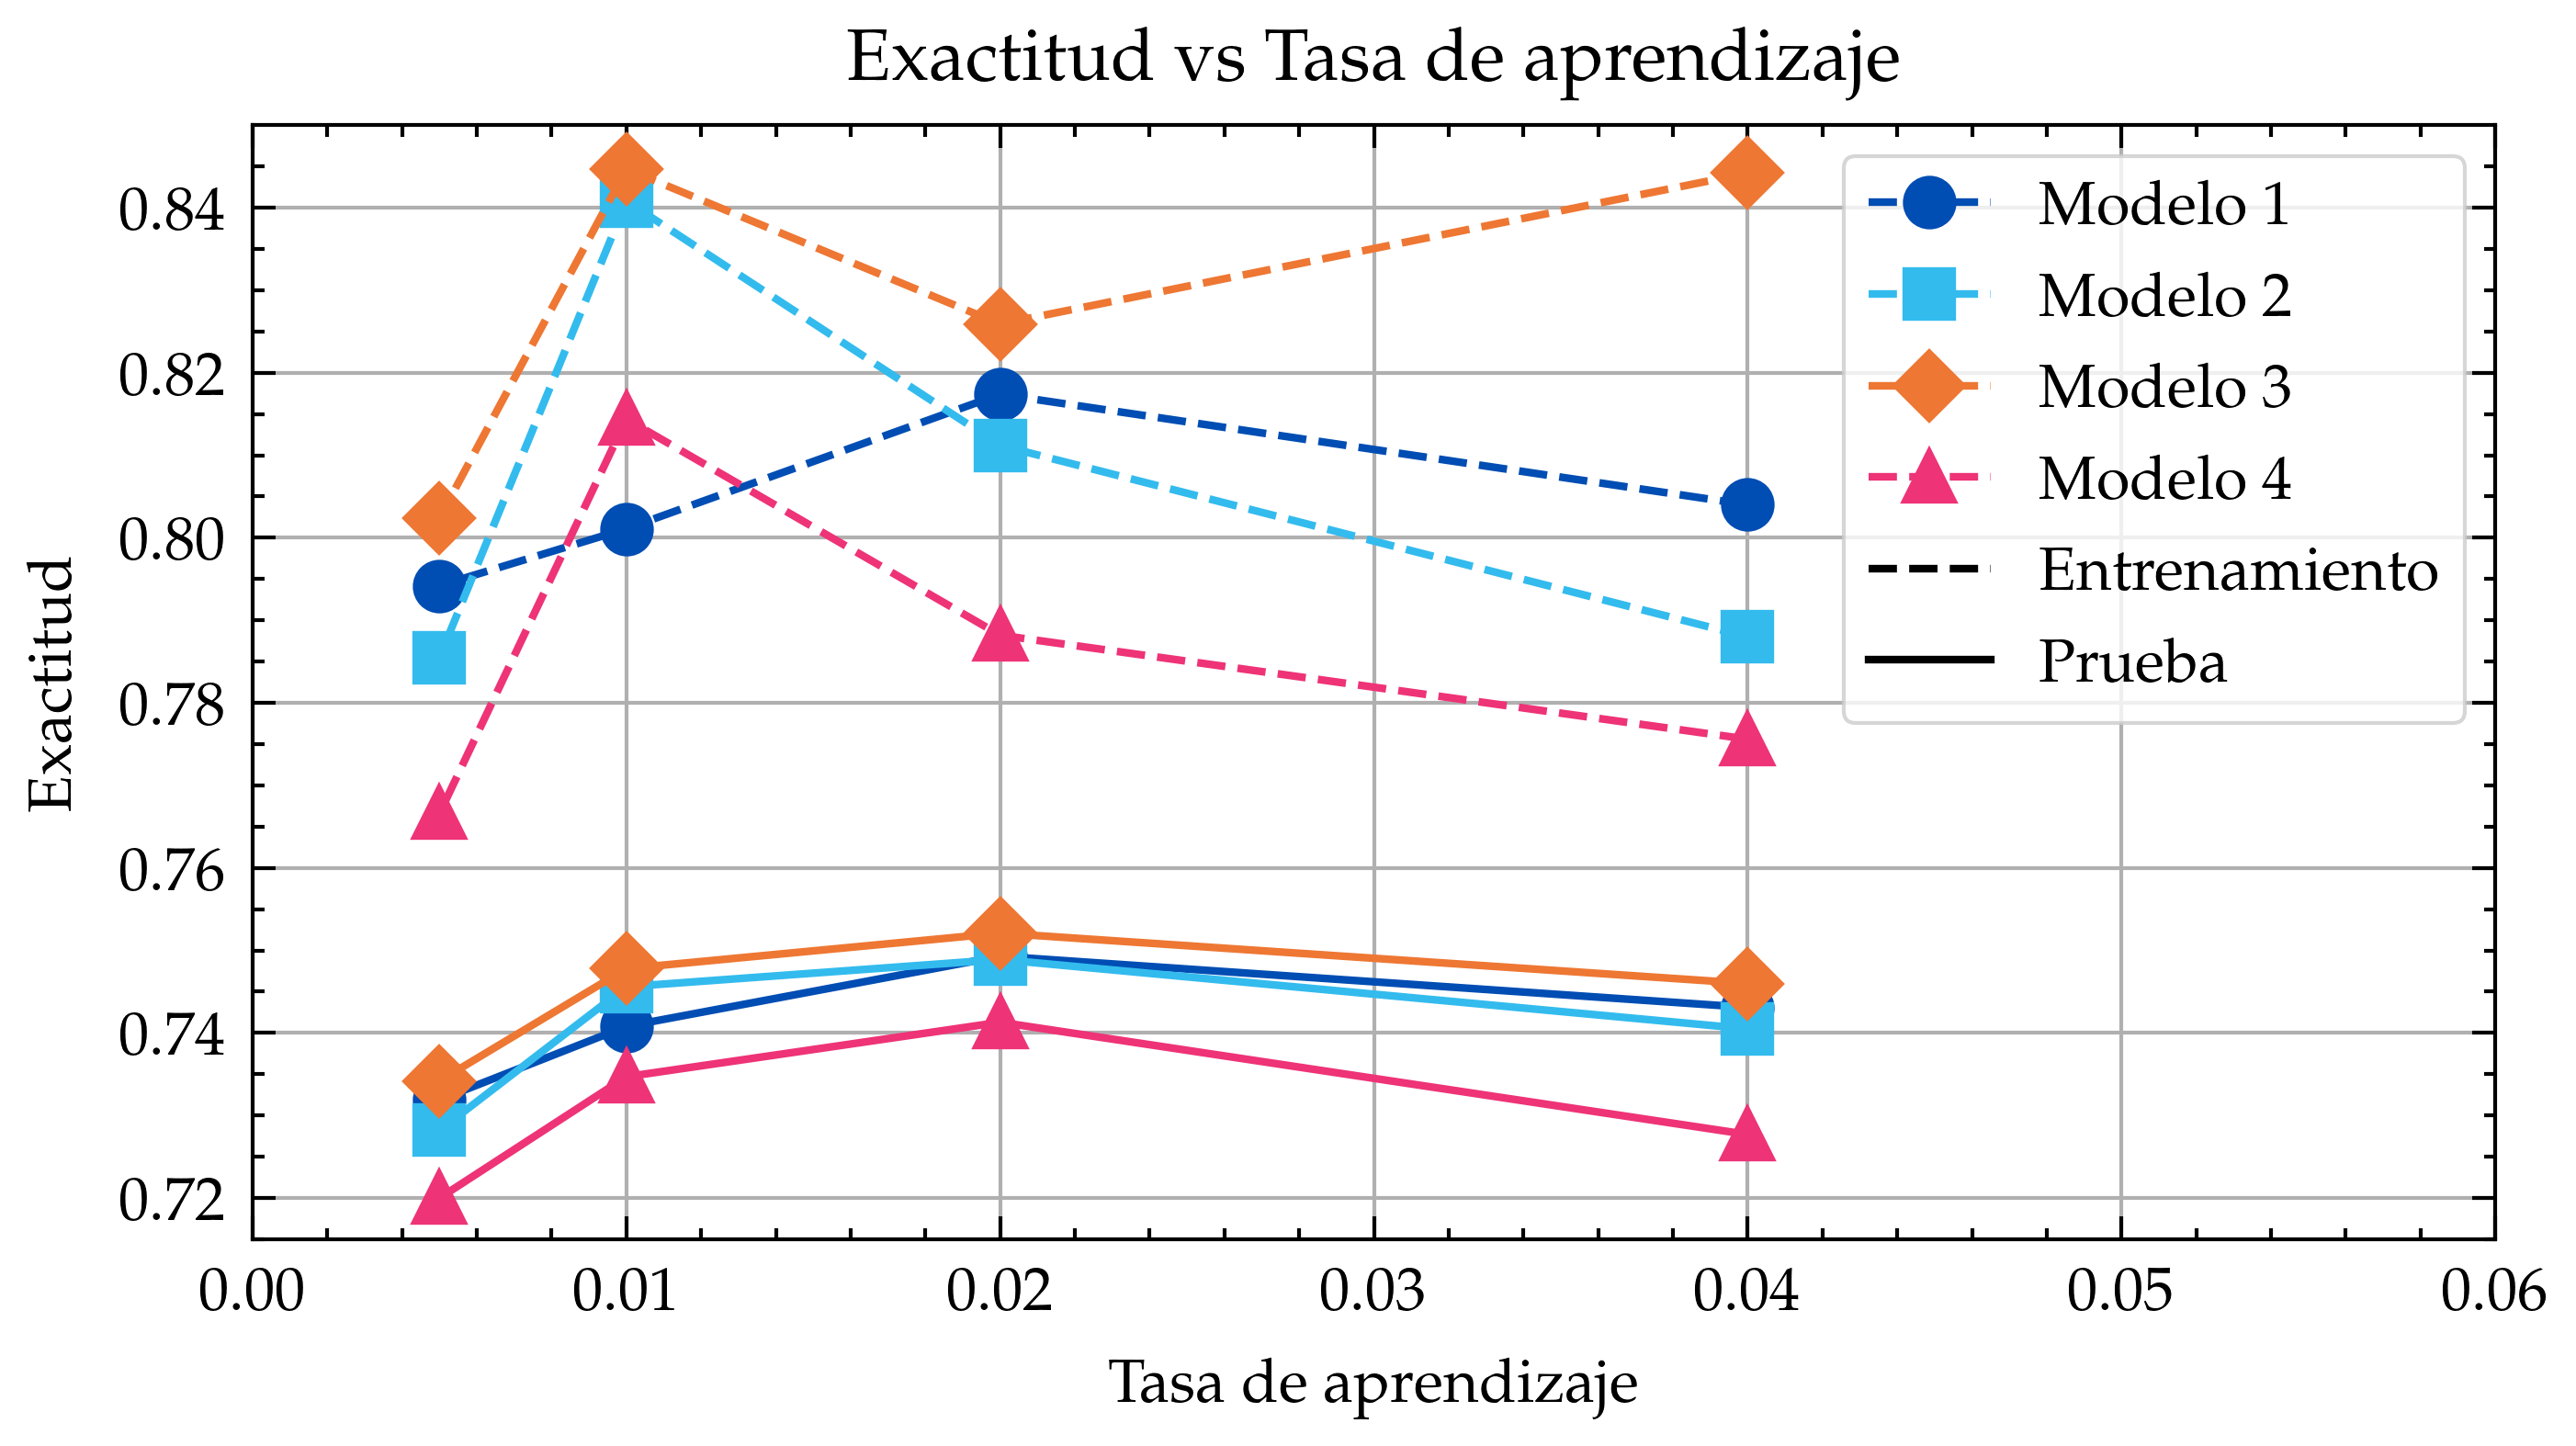

In [142]:
# Ruta del archivo CSV
file_path = "03_MLP/Grid_search/data_file.csv"
try:
    df = pd.read_csv(file_path)
    print("Archivo CSV leído correctamente:")
    print(df.head())  # Mostrar las primeras filas del DataFrame
except FileNotFoundError:
    print(f"No se pudo encontrar el archivo {file_path}")
    
    
lr = [0.04, 0.02, 0.01, 0.005]
bullets = ['o', 's', 'D', '^']

model0 = {'acc_tr' : df['acc_tr'][0:4], 'acc_val' : df['acc_val'][0:4]}
model1 = {'acc_tr' : df['acc_tr'][4:8], 'acc_val' : df['acc_val'][4:8]}
model2 = {'acc_tr' : df['acc_tr'][8:12], 'acc_val' : df['acc_val'][8:12]}
model3 = {'acc_tr' : df['acc_tr'][12:16], 'acc_val' : df['acc_val'][12:16]}

plt.figure(figsize=(1.5*3.5, 2.625))

colores = ['#004DB3', '#33BBEE', '#EE7733', '#EE3377', '#CC3311', '#009988', '#6600CC']

for i, model in enumerate([model0, model1, model2, model3]):
    plt.plot(lr, model['acc_tr'],'--', marker=bullets[i], color=colores[i], label=f"Modelo {i+1}")
    plt.plot(lr, model['acc_val'],'-', marker=bullets[i], color=colores[i])

plt.plot(0,0, '--', c='k', label='Entrenamiento')
plt.plot(0,0, '-', c='k', label='Prueba')
    
plt.grid(True)
plt.ylim(0.715, 0.85)
plt.xlim(0,0.06)
plt.xlabel("Tasa de aprendizaje")
plt.ylabel("Exactitud")
legend = plt.legend(frameon=True, loc='upper right')
legend.get_frame().set_linewidth(0.5)


plt.title('Exactitud vs Tasa de aprendizaje')
plt.savefig(out_directory+'/MLP_hiperp_model_lr.pdf')

## Estadísticas de validación cruzada

### SVM

In [135]:
# Ruta del archivo CSV
file_path = "01_SVM/Cross_validation/data_file_CV_stats.csv"
try:
    df = pd.read_csv(file_path)
    print("Archivo CSV leído correctamente:")
    print(df.head(), end=2*'\n')  # Mostrar las primeras filas del DataFrame
except FileNotFoundError:
    print(f"No se pudo encontrar el archivo {file_path}")

# Exactitud y MER:
top1_mean = df['1'][1]
# top3_mean = df['3'][1]
# top5_mean = df['5'][1]
MER_mean = df['MER'][1]

top1_std = df['1'][2]
# top3_std = df['3'][2]
# top5_std = df['5'][2]
MER_std = df['MER'][2]

print(f"TOP1: {100*top1_mean:.1f} ± {100*top1_std:.1f} %")
print(f"MER:  {100*MER_mean:.1f} ± {100*MER_std:.1f} %")

Archivo CSV leído correctamente:
  Unnamed: 0         1       MER
0      count  5.000000  5.000000
1       mean  0.547449  0.609789
2        std  0.002263  0.002060
3        min  0.544972  0.607163
4        25%  0.546086  0.608166

TOP1: 54.7 ± 0.2 %
MER:  61.0 ± 0.2 %


### RF

In [133]:
# Ruta del archivo CSV
file_path = "02_Random_Forest/Cross_validation/data_file_CV_stats.csv"
try:
    df = pd.read_csv(file_path)
    print("Archivo CSV leído correctamente:")
    print(df.head(), end=2*'\n')  # Mostrar las primeras filas del DataFrame
except FileNotFoundError:
    print(f"No se pudo encontrar el archivo {file_path}")

# Exactitud y MER:
top1_mean = df['1'][1]
top3_mean = df['3'][1]
top5_mean = df['5'][1]
MER_mean = df['MER'][1]

top1_std = df['1'][2]
top3_std = df['3'][2]
top5_std = df['5'][2]
MER_std = df['MER'][2]

print(f"TOP1:      {100*top1_mean:.1f} ± {100*top1_std:.1f} %")
print(f"TOP3:      {100*top3_mean:.1f} ± {100*top3_std:.1f} %")
print(f"TOP5:      {100*top5_mean:.1f} ± {100*top5_std:.1f} %")
print(f"MER:       {100*MER_mean:.1f} ± {100*MER_std:.1f} %")

Archivo CSV leído correctamente:
  Unnamed: 0         1         3         5       MER
0      count  5.000000  5.000000  5.000000  5.000000
1       mean  0.625659  0.792348  0.835889  0.696878
2        std  0.001428  0.001222  0.002068  0.001104
3        min  0.624401  0.790801  0.833079  0.695174
4        25%  0.624512  0.791582  0.835346  0.696400

TOP1:      62.6 ± 0.1 %
TOP3:      79.2 ± 0.1 %
TOP5:      83.6 ± 0.2 %
MER:       69.7 ± 0.1 %


### MLP

In [134]:
# Ruta del archivo CSV
file_path = "03_MLP/Cross_validation/data_file_CV_stats.csv"
try:
    df = pd.read_csv(file_path)
    print("Archivo CSV leído correctamente:")
    print(df.head(), end=2*'\n')  # Mostrar las primeras filas del DataFrame
except FileNotFoundError:
    print(f"No se pudo encontrar el archivo {file_path}")

# Exactitud y MER:
top1_mean = df['1'][1]
top3_mean = df['3'][1]
top5_mean = df['5'][1]
MER_mean = df['MER'][1]

top1_std = df['1'][2]
top3_std = df['3'][2]
top5_std = df['5'][2]
MER_std = df['MER'][2]

print(f"TOP1:      {100*top1_mean:.1f} ± {100*top1_std:.1f} %")
print(f"TOP3:      {100*top3_mean:.1f} ± {100*top3_std:.1f} %")
print(f"TOP5:      {100*top5_mean:.1f} ± {100*top5_std:.1f} %")
print(f"MER:       {100*MER_mean:.1f} ± {100*MER_std:.1f} %")

Archivo CSV leído correctamente:
  Unnamed: 0         1         3         5       MER
0      count  5.000000  5.000000  5.000000  5.000000
1       mean  0.746177  0.909679  0.938946  0.839805
2        std  0.003199  0.001389  0.001452  0.002417
3        min  0.740721  0.908314  0.936659  0.837983
4        25%  0.746146  0.908459  0.938812  0.838547

TOP1:      74.6 ± 0.3 %
TOP3:      91.0 ± 0.1 %
TOP5:      93.9 ± 0.1 %
MER:       84.0 ± 0.2 %


### CNN

Sin data augmentation

In [137]:
# Ruta del archivo CSV
for path in ['01_2_Layer', '02_3_Layer', '03_4_Layer']:
    file_path = f"04_CNN/{path}/data_file_CV_stats.csv"
    try:
        df = pd.read_csv(file_path)
        print("Archivo CSV leído correctamente:")
        print(df.head(), end=2*'\n')  # Mostrar las primeras filas del DataFrame
    except FileNotFoundError:
        print(f"No se pudo encontrar el archivo {file_path}")

    # Exactitud y MER:
    top1_mean = df['1'][1]
    top3_mean = df['3'][1]
    top5_mean = df['5'][1]
    MER_mean = df['MER'][1]

    top1_std = df['1'][2]
    top3_std = df['3'][2]
    top5_std = df['5'][2]
    MER_std = df['MER'][2]
    
    print(path+'----------------------------------------------------')
    print(f"TOP1:      {100*top1_mean:.1f} ± {100*top1_std:.1f} %")
    print(f"TOP3:      {100*top3_mean:.1f} ± {100*top3_std:.1f} %")
    print(f"TOP5:      {100*top5_mean:.1f} ± {100*top5_std:.1f} %")
    print(f"MER:       {100*MER_mean:.1f} ± {100*MER_std:.1f} %", end=2*'\n')

Archivo CSV leído correctamente:
  Unnamed: 0         1         3         5       MER    epochs
0      count  5.000000  5.000000  5.000000  5.000000  5.000000
1       mean  0.737514  0.901520  0.931144  0.828823  1.400000
2        std  0.002789  0.000861  0.000979  0.001869  0.547723
3        min  0.734740  0.900286  0.929636  0.826206  1.000000
4        25%  0.735223  0.901178  0.930938  0.828250  1.000000

01_2_Layer----------------------------------------------------
TOP1:      73.8 ± 0.3 %
TOP3:      90.2 ± 0.1 %
TOP5:      93.1 ± 0.1 %
MER:       82.9 ± 0.2 %

Archivo CSV leído correctamente:
  Unnamed: 0         1         3         5       MER    epochs
0      count  5.000000  5.000000  5.000000  5.000000  5.000000
1       mean  0.783224  0.932014  0.954869  0.875544  2.400000
2        std  0.004651  0.000662  0.001051  0.001428  0.547723
3        min  0.777055  0.931047  0.953227  0.873909  2.000000
4        25%  0.781031  0.931719  0.954640  0.874837  2.000000

02_3_Layer------

MNIST model

In [138]:
# Ruta del archivo CSV
for path in ['epochs_13', 'prueba_epochs_14', 'prueba_training_val_test']:
    file_path = f"04_CNN/00_MNIST_model/Cross_validation/{path}/data_file_CV_stats.csv"
    try:
        df = pd.read_csv(file_path)
        print("Archivo CSV leído correctamente:")
        print(df.head(), end=2*'\n')  # Mostrar las primeras filas del DataFrame
    except FileNotFoundError:
        print(f"No se pudo encontrar el archivo {file_path}")

    # Exactitud y MER:
    top1_mean = df['1'][1]
    top3_mean = df['3'][1]
    top5_mean = df['5'][1]
    MER_mean = df['MER'][1]

    top1_std = df['1'][2]
    top3_std = df['3'][2]
    top5_std = df['5'][2]
    MER_std = df['MER'][2]
    
    print(path+'----------------------------------------------------')
    print(f"TOP1:      {100*top1_mean:.1f} ± {100*top1_std:.1f} %")
    print(f"TOP3:      {100*top3_mean:.1f} ± {100*top3_std:.1f} %")
    print(f"TOP5:      {100*top5_mean:.1f} ± {100*top5_std:.1f} %")
    print(f"MER:       {100*MER_mean:.1f} ± {100*MER_std:.1f} %", end=2*'\n')

Archivo CSV leído correctamente:
  Unnamed: 0         1         3         5       MER
0      count  5.000000  5.000000  5.000000  5.000000
1       mean  0.799905  0.945656  0.965591  0.885679
2        std  0.002255  0.000819  0.000990  0.000734
3        min  0.797117  0.944422  0.964706  0.884757
4        25%  0.798417  0.945241  0.964782  0.885054

epochs_13----------------------------------------------------
TOP1:      80.0 ± 0.2 %
TOP3:      94.6 ± 0.1 %
TOP5:      96.6 ± 0.1 %
MER:       88.6 ± 0.1 %

Archivo CSV leído correctamente:
  Unnamed: 0         1         3         5       MER
0      count  5.000000  5.000000  5.000000  5.000000
1       mean  0.803271  0.946220  0.966222  0.888406
2        std  0.002487  0.001844  0.001612  0.001460
3        min  0.799495  0.943159  0.963815  0.886689
4        25%  0.802058  0.946539  0.965562  0.887246

prueba_epochs_14----------------------------------------------------
TOP1:      80.3 ± 0.2 %
TOP3:      94.6 ± 0.2 %
TOP5:      96.6 ± 0.

### Modelo MNIST entrenado en el conjunto de entrenamiento entero y evaluado en el conjunto de TEST.

In [148]:
file_path = f"04_CNN/00_MNIST_model/Test_performance/data_file_stats.csv"
try:
    df = pd.read_csv(file_path)
    print("Archivo CSV leído correctamente:")
    print(df.head(), end=2*'\n')  # Mostrar las primeras filas del DataFrame
except FileNotFoundError:
    print(f"No se pudo encontrar el archivo {file_path}")

# Exactitud y MER:
top1_mean = df['1'][1]
top3_mean = df['3'][1]
top5_mean = df['5'][1]
MER_mean = df['MER'][1]

top1_std = df['1'][2]
top3_std = df['3'][2]
top5_std = df['5'][2]
MER_std = df['MER'][2]

print(path+'----------------------------------------------------')
print(f"TOP1:      {100*top1_mean:.1f} %")
print(f"TOP3:      {100*top3_mean:.1f} %")
print(f"TOP5:      {100*top5_mean:.1f} %")
print(f"MER:       {100*MER_mean:.1f} %", end=2*'\n')

Archivo CSV leído correctamente:
  Unnamed: 0         1         3         5       MER
0      count  1.000000  1.000000  1.000000  1.000000
1       mean  0.808036  0.951288  0.970012  0.895147
2        std       NaN       NaN       NaN       NaN
3        min  0.808036  0.951288  0.970012  0.895147
4        25%  0.808036  0.951288  0.970012  0.895147

aug_CNN_4_layer_1000----------------------------------------------------
TOP1:      80.8 %
TOP3:      95.1 %
TOP5:      97.0 %
MER:       89.5 %



## Bases de datos aumentadas

### Modelo MNIST

In [144]:
# Ruta del archivo CSV
for path in ['aug_400', 'aug_600', 'aug_1000', 'aug_2811']:
    file_path = f"05_CNN_aug/{path}/data_file_aug_stats.csv"
    try:
        df = pd.read_csv(file_path)
        print("Archivo CSV leído correctamente:")
        print(df.head(), end=2*'\n')  # Mostrar las primeras filas del DataFrame
    except FileNotFoundError:
        print(f"No se pudo encontrar el archivo {file_path}")

    # Exactitud y MER:
    top1_mean = df['1'][1]
    top3_mean = df['3'][1]
    top5_mean = df['5'][1]
    MER_mean = df['MER'][1]

    top1_std = df['1'][2]
    top3_std = df['3'][2]
    top5_std = df['5'][2]
    MER_std = df['MER'][2]
    
    print(path+'----------------------------------------------------')
    print(f"TOP1:      {100*top1_mean:.1f} %")
    print(f"TOP3:      {100*top3_mean:.1f} %")
    print(f"TOP5:      {100*top5_mean:.1f} %")
    print(f"MER:       {100*MER_mean:.1f} %", end=2*'\n')

Archivo CSV leído correctamente:
  Unnamed: 0         1         3         5       MER
0      count  1.000000  1.000000  1.000000  1.000000
1       mean  0.773412  0.940797  0.964038  0.882991
2        std       NaN       NaN       NaN       NaN
3        min  0.773412  0.940797  0.964038  0.882991
4        25%  0.773412  0.940797  0.964038  0.882991

aug_400----------------------------------------------------
TOP1:      77.3 %
TOP3:      94.1 %
TOP5:      96.4 %
MER:       88.3 %

Archivo CSV leído correctamente:
  Unnamed: 0         1         3         5      MER
0      count  1.000000  1.000000  1.000000  1.00000
1       mean  0.794068  0.946563  0.967278  0.88944
2        std       NaN       NaN       NaN      NaN
3        min  0.794068  0.946563  0.967278  0.88944
4        25%  0.794068  0.946563  0.967278  0.88944

aug_600----------------------------------------------------
TOP1:      79.4 %
TOP3:      94.7 %
TOP5:      96.7 %
MER:       88.9 %

Archivo CSV leído correctamente:
  U

### CNN con 4 capas

In [146]:
# Ruta del archivo CSV
for path in ['aug_CNN_4_layer_400', 'aug_CNN_4_layer_1000']:
    file_path = f"05_CNN_aug/{path}/data_file_aug_stats.csv"
    try:
        df = pd.read_csv(file_path)
        print("Archivo CSV leído correctamente:")
        print(df.head(), end=2*'\n')  # Mostrar las primeras filas del DataFrame
    except FileNotFoundError:
        print(f"No se pudo encontrar el archivo {file_path}")

    # Exactitud y MER:
    top1_mean = df['1'][1]
    top3_mean = df['3'][1]
    top5_mean = df['5'][1]
    MER_mean = df['MER'][1]

    top1_std = df['1'][2]
    top3_std = df['3'][2]
    top5_std = df['5'][2]
    MER_std = df['MER'][2]
    
    print(path+'----------------------------------------------------')
    print(f"TOP1:      {100*top1_mean:.1f} %")
    print(f"TOP3:      {100*top3_mean:.1f} %")
    print(f"TOP5:      {100*top5_mean:.1f} %")
    print(f"MER:       {100*MER_mean:.1f} %", end=2*'\n')

Archivo CSV leído correctamente:
  Unnamed: 0         1         3         5       MER
0      count  1.000000  1.000000  1.000000  1.000000
1       mean  0.773353  0.947425  0.968794  0.891461
2        std       NaN       NaN       NaN       NaN
3        min  0.773353  0.947425  0.968794  0.891461
4        25%  0.773353  0.947425  0.968794  0.891461

aug_CNN_4_layer_400----------------------------------------------------
TOP1:      77.3 %
TOP3:      94.7 %
TOP5:      96.9 %
MER:       89.1 %

Archivo CSV leído correctamente:
  Unnamed: 0        1         3         5       MER
0      count  1.00000  1.000000  1.000000  1.000000
1       mean  0.79276  0.954498  0.973549  0.900051
2        std      NaN       NaN       NaN       NaN
3        min  0.79276  0.954498  0.973549  0.900051
4        25%  0.79276  0.954498  0.973549  0.900051

aug_CNN_4_layer_1000----------------------------------------------------
TOP1:      79.3 %
TOP3:      95.4 %
TOP5:      97.4 %
MER:       90.0 %

